In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Platinum.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,933.5,930.5,933.5,930.5,1/1/2018
1,931.0,945.5,946.5,931.0,1/2/2018
2,945.0,957.0,961.0,940.5,1/3/2018
3,955.0,964.0,966.5,945.0,1/4/2018
4,963.0,969.5,970.5,959.5,1/5/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

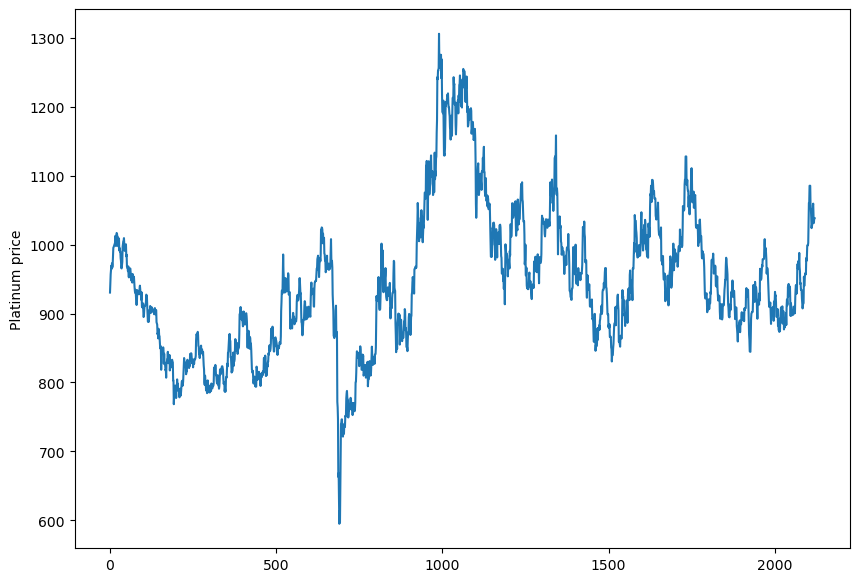

In [17]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Platinum price")
plt.show()


In [6]:
t = .7
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.13720419897833103
c:  837.1110312015029


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1040.722062
1,1040.859267
2,1040.996471
3,1041.133675
4,1041.270879
...,...
632,1127.435116
633,1127.572320
634,1127.709525
635,1127.846729


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 14.111393429073951
Mean Squared Error (MSE): 21354.894408819833
Root Mean Squared Error (RMSE): 146.13313932445246


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[1128.12113723 1128.25834143 1128.39554563 1128.53274983 1128.66995403
 1128.80715823 1128.94436243 1129.08156663 1129.21877083 1129.35597503
 1129.49317922 1129.63038342 1129.76758762 1129.90479182 1130.04199602
 1130.17920022 1130.31640442 1130.45360862 1130.59081282 1130.72801702
 1130.86522121 1131.00242541 1131.13962961 1131.27683381 1131.41403801
 1131.55124221 1131.68844641 1131.82565061 1131.96285481 1132.100059
 1132.2372632  1132.3744674  1132.5116716  1132.6488758  1132.78608
 1132.9232842  1133.0604884  1133.1976926  1133.3348968  1133.47210099
 1133.60930519 1133.74650939 1133.88371359 1134.02091779 1134.15812199
 1134.29532619 1134.43253039 1134.56973459 1134.70693879 1134.84414298
 1134.98134718 1135.11855138 1135.25575558 1135.39295978 1135.53016398
 1135.66736818 1135.80457238 1135.94177658 1136.07898078 1136.21618497
 1136.35338917 1136.49059337 1136.62779757 1136.76500177 1136.90220597
 1137.03941017 1137.17661437 1137.3

In [15]:
plt.rcParams['figure.figsize'] = [18, 10]

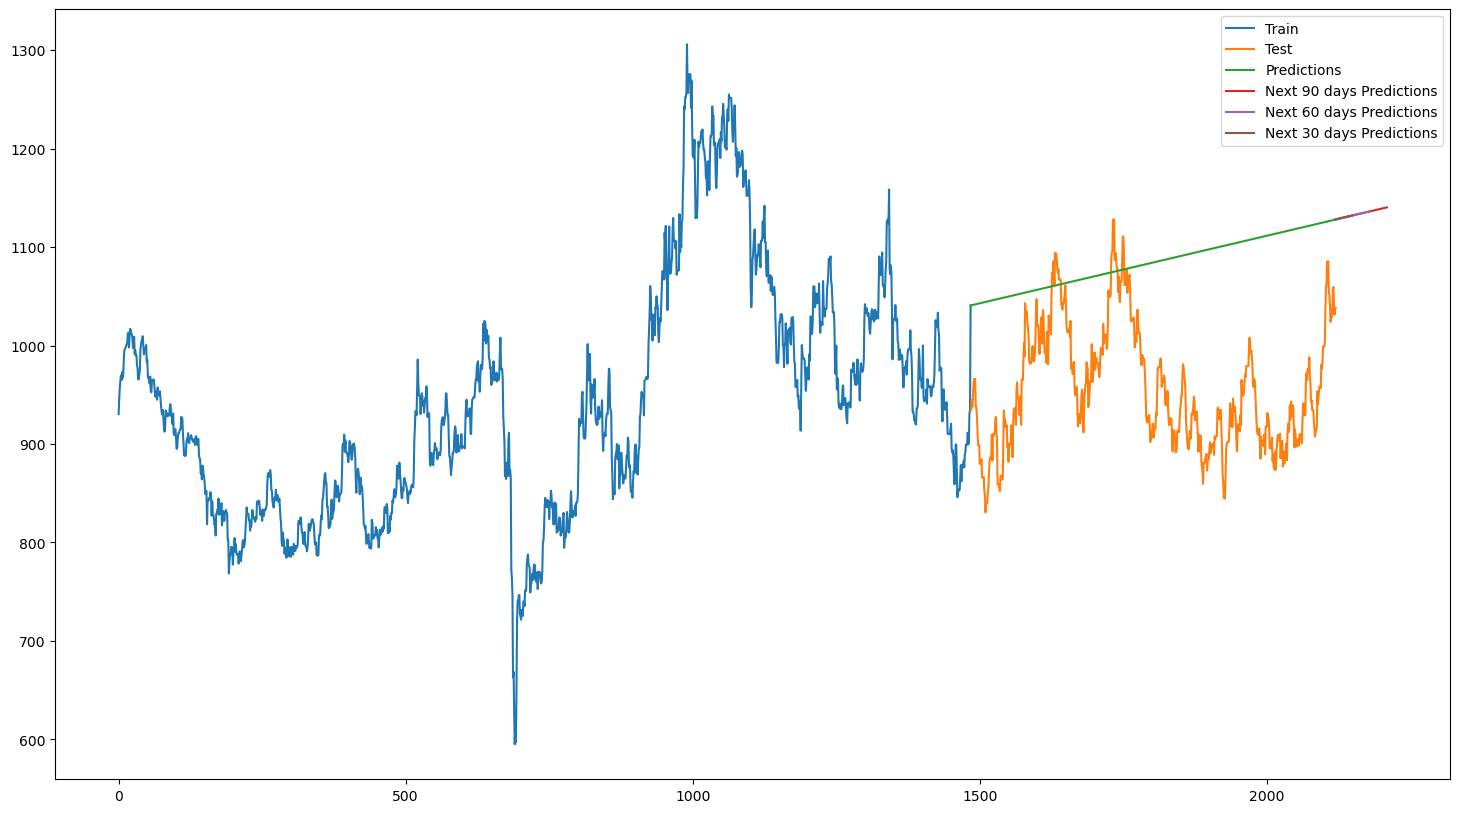

In [16]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])

plt.show()